## PS2
## Lerong Wang

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import LeaveOneOut
%matplotlib notebook


## 1a

In [181]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
bq_data.view()

array([[  0.00000000e+00,   2.83821991e-04,   6.02760667e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  1.78678994e-04,   3.49568070e-04,   0.00000000e+00,
          8.23400392e-06,   8.34493170e-06,   2.51913214e-05,
          0.00000000e+00],
       [  4.47625680e-04,   9.70091124e-05,   0.00000000e+00,
          0.00000000e+00,   1.20441636e-04,   4.74592862e-04,
          1.11411735e-02],
       [  8.77122467e-05,   1.97168377e-05,   1.67393465e-04,
          3.37768206e-04,   0.00000000e+00,   0.00000000e+00,
          7.68656636e-05],
       [  1.30667055e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.30857801e-05,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.17250614e-04,   0.00000000e+00,   7.51155655e-05,
          2.88012798e-03],
       [  5.91784831e-04,   0.00000000e+00,   1.20779289e-04,
          1.07985346e-03,   2.87

<IPython.core.display.Javascript object>


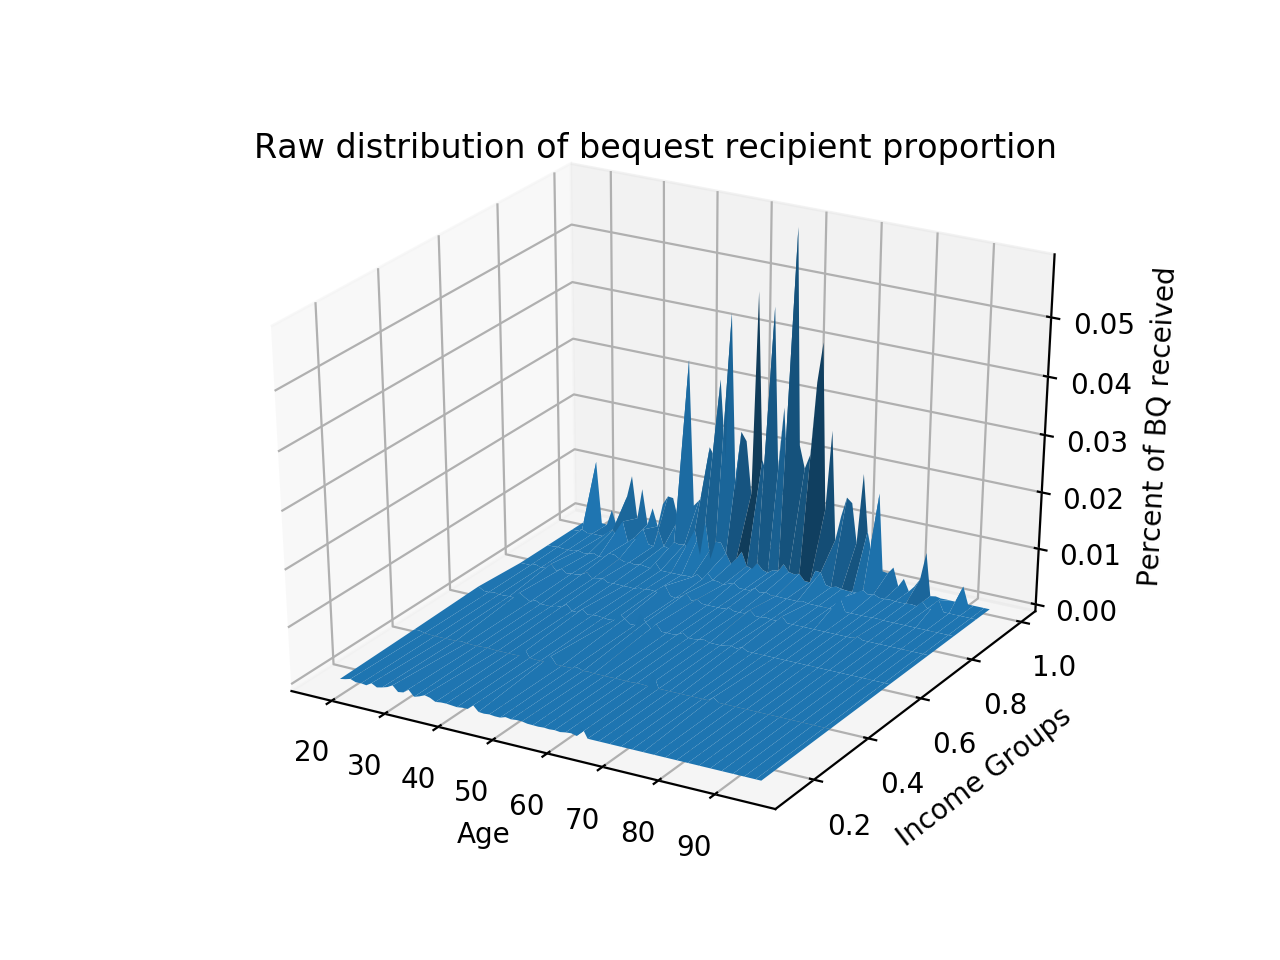

Text(0.5,0,'Percent of BQ received')

In [182]:
age_vec = np.arange(18, 96)
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
y_mat, x_mat = np.meshgrid(abils_midpt, age_vec)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_mat, y_mat, bq_data)
ax.set_title('Raw distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Groups')
ax.set_zlabel('Percent of BQ received')

## 1b

In [183]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut(len(bq_data)))
grid.fit(bq_data)

GridSearchCV(cv=sklearn.cross_validation.LeaveOneOut(n=78),
       error_score='raise',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bandwidth': array([  0.1    ,   0.10476, ...,   9.54548,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [184]:
print("the best bandwidth paramether is ", grid.best_params_)

the best bandwidth paramether is  {'bandwidth': 0.10000000000000001}


<IPython.core.display.Javascript object>


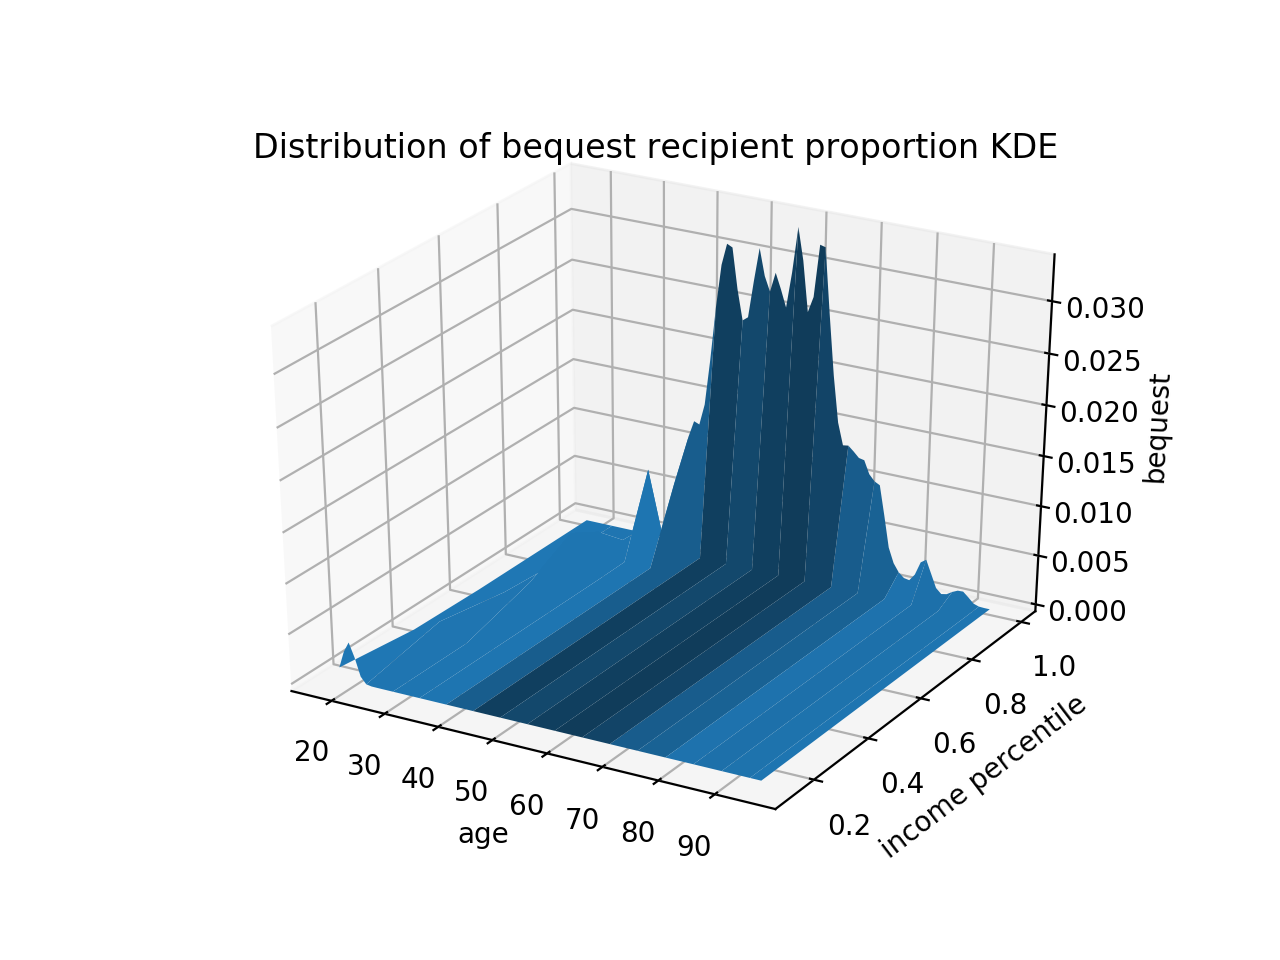

In [185]:
bandwidth=0.1
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(age_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)


data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=bandwidth)


coords = np.vstack([item.ravel() for item in [x_mat, y_mat]])
BQkde = density(coords).reshape(x_mat.shape)
BQkde_scaled = BQkde / BQkde.sum()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('age')
ax.set_ylabel('income percentile')
ax.set_zlabel('bequest')
ax.set_title('Distribution of bequest recipient proportion KDE')
ax.plot_surface(x_mat, y_mat, BQkde_scaled, rstride=5)

In [186]:
print("the estimated density for bequest recipients who are age 61 in "
      "the 6th lifetime income category is ", BQkde_scaled[61, 5])

the estimated density for bequest recipients who are age 61 in the 6th lifetime income category is  1.29257661082e-07


## 2a

In [187]:
biden = pd.read_csv('biden.csv')
biden.head()

,biden,female,age,educ,dem,rep
0,90.0,0,19.0,12.0,1.0,0.0
1,70.0,1,51.0,14.0,1.0,0.0
2,60.0,0,27.0,14.0,0.0,0.0
3,50.0,1,43.0,14.0,1.0,0.0
4,60.0,1,38.0,14.0,0.0,1.0


In [188]:
biden['age*educ'] = biden['age']*biden['educ']
biden.head()

,biden,female,age,educ,dem,rep,age*educ
0,90.0,0,19.0,12.0,1.0,0.0,228.0
1,70.0,1,51.0,14.0,1.0,0.0,714.0
2,60.0,0,27.0,14.0,0.0,0.0,378.0
3,50.0,1,43.0,14.0,1.0,0.0,602.0
4,60.0,1,38.0,14.0,0.0,1.0,532.0


In [189]:
biden.describe()

,biden,female,age,educ,dem,rep,age*educ
count,1863.000000,2323.000000,2277.000000,2312.000000,2290.000000,2290.000000,2272.000000
mean,61.990338,0.569953,47.368906,13.075692,0.426638,0.188646,612.388644
std,23.480433,0.495189,17.379615,2.593284,0.494697,0.391313,246.569101
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,33.000000,12.000000,0.000000,0.000000,425.000000
50%,60.000000,1.000000,47.000000,13.000000,0.000000,0.000000,593.000000
75%,85.000000,1.000000,59.000000,15.000000,1.000000,0.000000,770.000000
max,100.000000,1.000000,93.000000,17.000000,1.000000,1.000000,1445.000000


In [190]:
y = biden['biden']
X = sm.add_constant(biden[['age', 'educ', 'age*educ']])
result = sm.OLS(y, X, missing='drop', hasconst=True)
print(result.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        09:35:13   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5491      9.491      3.956      0.0

The marginal effect of age on Joe biden thermometer rating, conditional on education is 0.667-0.0477 $*$ educ. The marginal effect has a slope of -0.0477, so the magnitude is 0.0477. The direction of marginal effect is negative, and the marginal effect of age on Joe biden thermometer rating decreases as education increases. All coefficients are statistically significant at $\alpha$ = 0.05. age and the interaction term age*educ are statistically significant at $\alpha$ = 0.01.

<IPython.core.display.Javascript object>


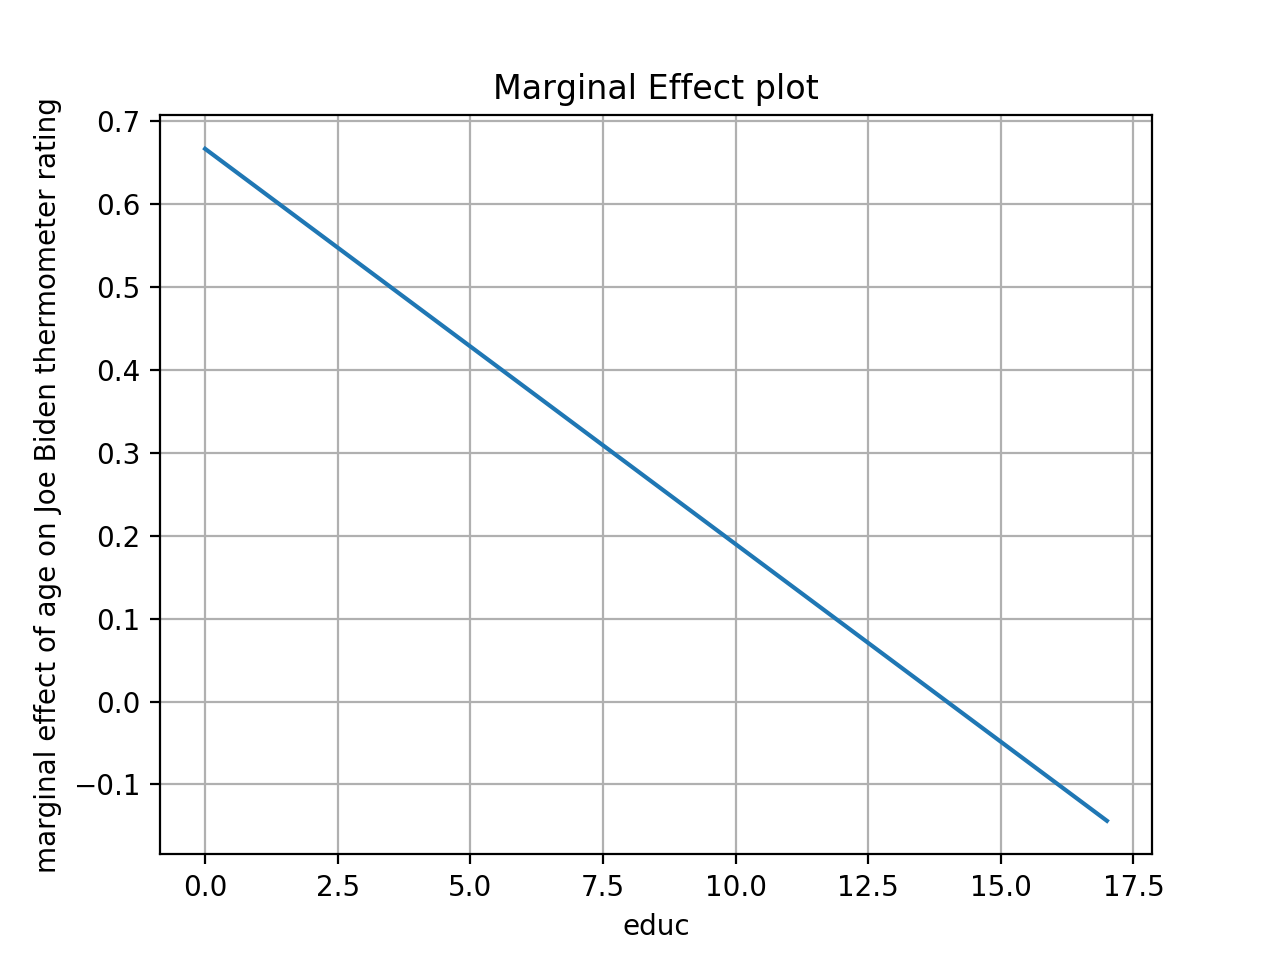

In [191]:
x = np.linspace(0, 17, 1000, endpoint  = True) 
fig, ax = plt.subplots()
ax.plot(x, 0.667-0.0477*x)
ax.set_ylabel("marginal effect of age on Joe Biden thermometer rating")
ax.set_xlabel("educ")
ax.set_title("Marginal Effect plot")
ax.grid(True, which='both')
plt.show()

## 2b

The marginal effect of education on Joe Biden thermometer rating, conditional on age is 1.7123-0.0477 $*$ age. The marginal effect has a slope of -0.0477, so the magnitude is 0.0477. The direction of marginal effect is negative, and the marginal effect of education on Joe Biden thermometer rating decreases as age increases. All coefficients are statistically significant at $\alpha$ = 0.05. the interaction term age*educ is statistically significant at $\alpha$ = 0.01.

<IPython.core.display.Javascript object>


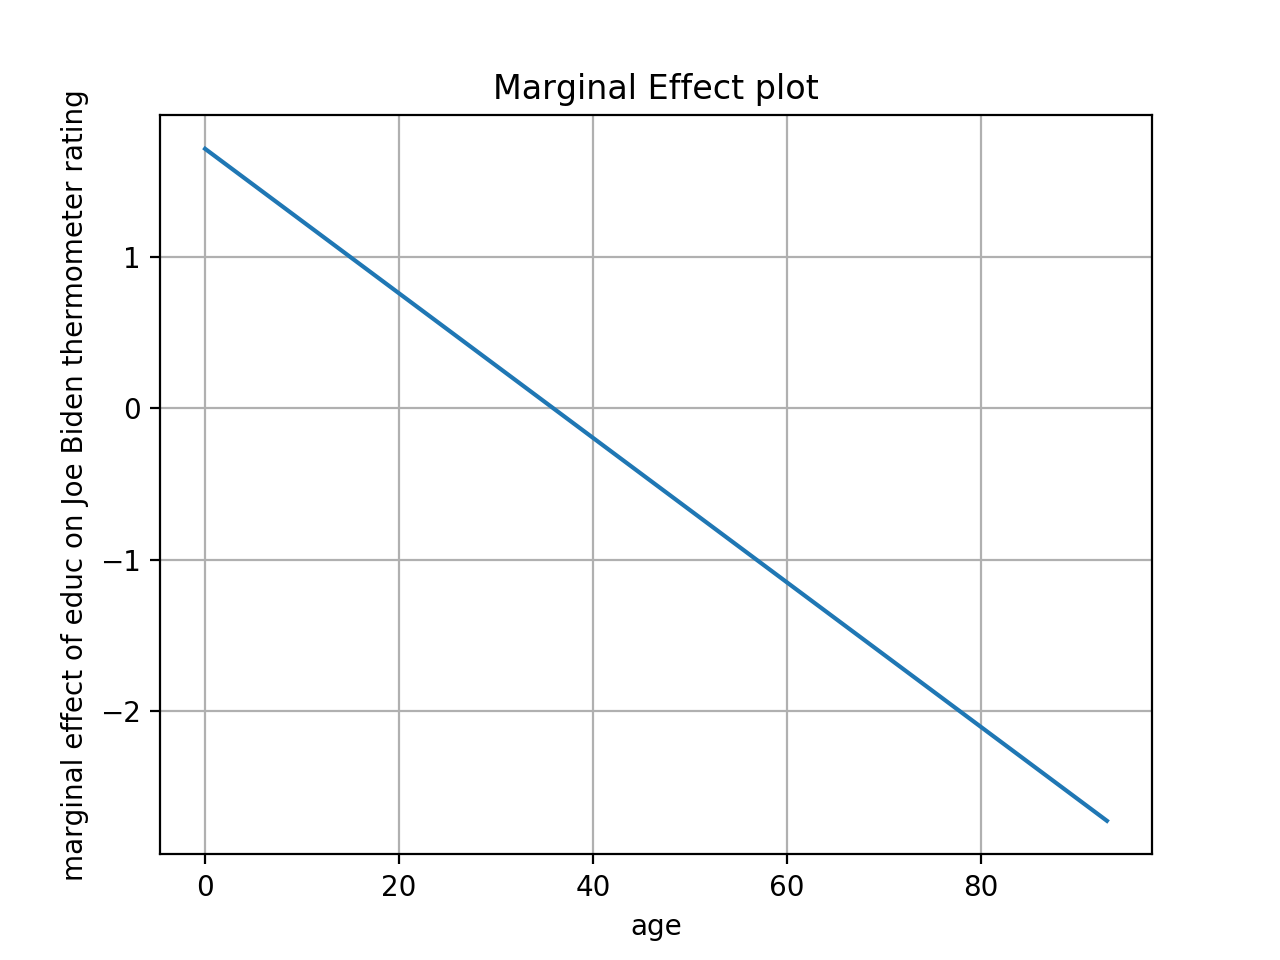

In [192]:
x = np.linspace(0, 93, 1000, endpoint  = True)   
fig, ax = plt.subplots()
ax.plot(x, 1.7123-0.0477*x)
ax.grid(True, which='both')
ax.set_ylabel("marginal effect of educ on Joe Biden thermometer rating")
ax.set_xlabel("age")
ax.set_title("Marginal Effect plot")
plt.show()

<IPython.core.display.Javascript object>


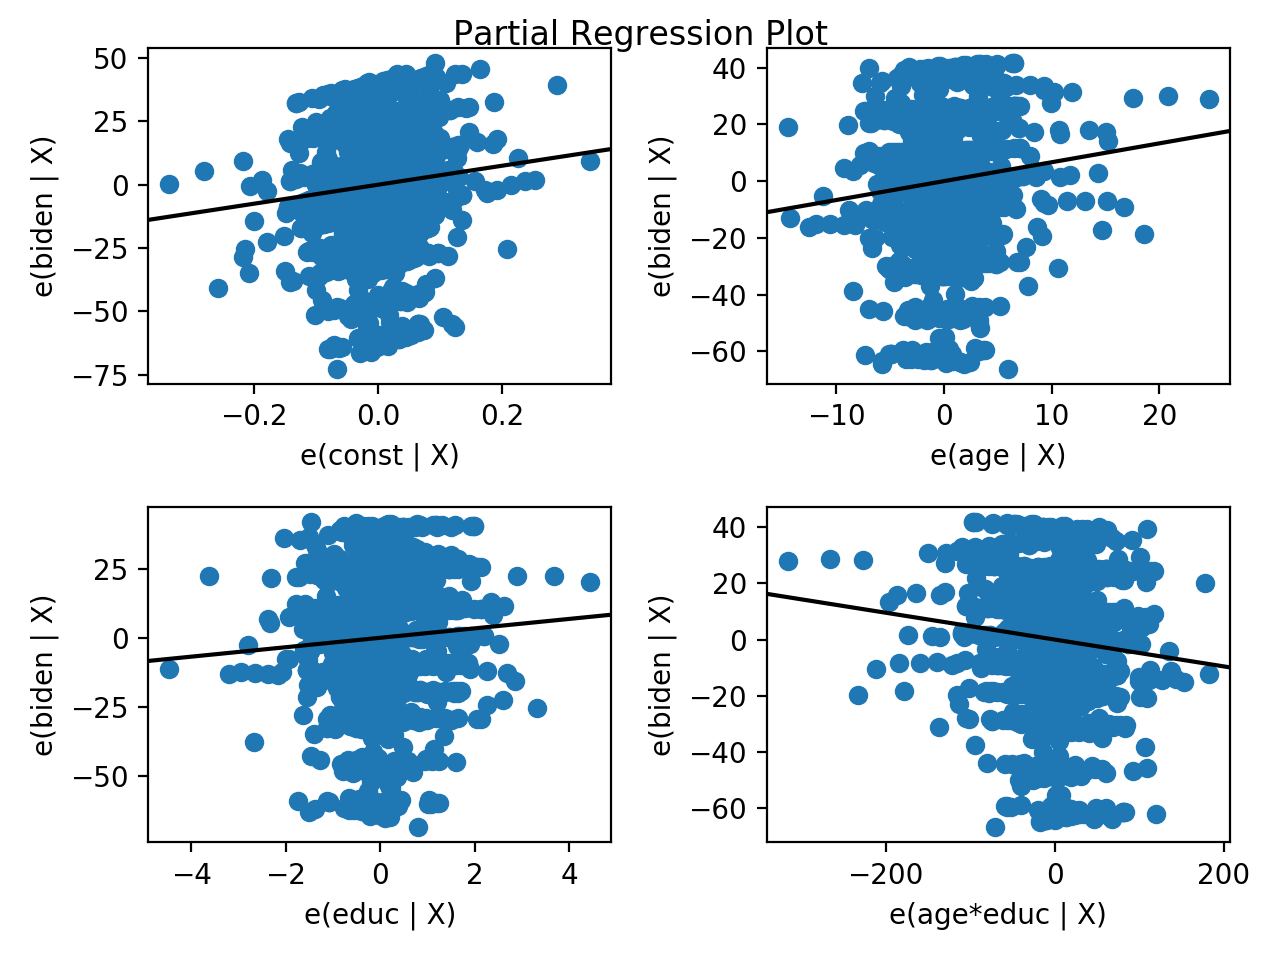

In [193]:
fig = plt.figure()
fig = sm.graphics.plot_partregress_grid(result.fit(),fig=fig)